#Donkey Car "Lane Detectionator" Segnet
## Notebook Context

This notebook details the design and implementation of a U-Net segmentation network. Currently this segnet will be trained only to detect and mask over lane lines as a means of lane detection. This is also chosen as a solution due to its scalability - by way of transfer learning and re-training this model can be used to mask lane lines, road signs, padestrians and vehicles. This information can then be used to communicate an action to the main driving CNN (such as brake, drive, or avoid). 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Step 1: Dataset Retrieval and Management
 
This dataset consists of lane line images from several environments (real-world and simulated) as well as their masks (which are manually generated.) These images and their masks will be used 


In [ ]:
#Mount Data Paths


In [ ]:
#Unzip data folders

In [ ]:
#Import required packages for this step:

import os   #For retrieving files
import natsort #For sorting retrieved files
import numpy as np #Calculations, arrays, etc.
import cv2 #Image preprocessing, loading and saving images
import json #For processing json files
import tensorflow as tf  #For the ML side
from random import randrange 

import matplotlib.pyplot as plt #Plots


#Make sure plots happen inline


%matplotlib inline

In [ ]:
#Import Data

In [ ]:
#Training and Validation Splits

### Step 2: Set Up Network and Experiment


In [ ]:
import os
os.environ['NEPTUNE_API_TOKEN'] = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiOTgyNzBkM2EtMzZhNC00NDkwLWJiNmEtNDJiYzQ0ZDRjZWNkIn0='

In [ ]:

#Neptune experiment initialization:
try:
   import neptune
except:
  !pip install neptune-client
  import neptune
#Import neptune and initialise tracking of an experiment

neptune.init(
    api_token=None,
    project_qualified_name="charag/Littlefoot"
) #API Token is set to environment variable and the project name littlefoot is selected


#Enable logging in a neptune experiment - define keras callbacks and create a neptune logger class

from tensorflow.keras.callbacks import Callback

class NeptuneLogger(Callback):

    def on_batch_end(self, batch, logs={}): #Log metrics after every batch
        for log_name, log_value in logs.items():
            neptune.log_metric(f'batch_{log_name}', log_value)

    def on_epoch_end(self, epoch, logs={}): #log metrics after every epoch
        for log_name, log_value in logs.items():
            neptune.log_metric(f'epoch_{log_name}', log_value)


#Experiment Parameters:

OPTIMIZER = 'adam' #stochastic gradient descent
LOSS = 'mse' #absolute error from the value desired
#LOSS = 'mae'
EPOCH = 300
BATCH = 132


In [ ]:
#Start Experiment:
neptune.create_experiment(name='Segnet Build',
                          params={'epochs': EPOCH,
                                  'batch_size': BATCH,
                                  'Optimization' : OPTIMIZER,
                                  'LOSS': LOSS},         
                          tags=['Segnet_Build'],
                          )


https://ui.neptune.ai/charag/Littlefoot/e/LIT-121


Experiment(LIT-121)

In [ ]:
# Imports: Tensorflow 1.14.0 is used
import os
import numpy as np

from tensorflow.python import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Convolution2D, Convolution1D, MaxPooling2D, Reshape, BatchNormalization
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Cropping2D, Lambda


In [ ]:
#Model Structure Setup:


In [ ]:
#Compile Model 
model.compile(optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=['accuracy'])

model.summary()

In [ ]:
#Fit Model to Data
EarlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
save_best = keras.callbacks.ModelCheckpoint('Lit.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#model.fit(x_fit, y_fit, epochs=EPOCH, batch_size=1, validation_data=(x_fit, y_fit),callbacks=[NeptuneLogger()], shuffle=True, verbose=1)

#model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_data=(x_val, y_val),callbacks=[NeptuneLogger(), EarlyStop, save_best], shuffle=True, verbose=1)

model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH, validation_data=(x_val, y_val),callbacks=[NeptuneLogger(), save_best], shuffle=True, verbose=1)
#Stop Neptune Experiment:

neptune.stop()

## STEP 3: Validate Your Model
After the experiment has completed, select a random image/label pair with which to run a prediction, or even a set of these predictions, to have a tangible vision of how the model performs.

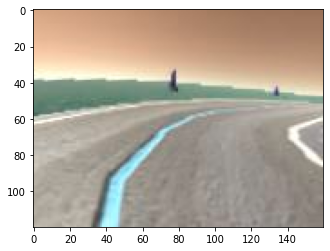

Label:
1.0
23/23 [==============================] - 1s 24ms/step - loss: 0.0624 - accuracy: 0.8018
result:
[0.9973293]
0.062447131542145096
0.9375528684578549
0.062447131542145096


In [ ]:
#Model Validation